In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.impute import SimpleImputer

In [2]:
#Loading in the Cleaned data set 
file_path = r"data/CleanedMusic.csv"

df = pd.read_csv(file_path)

In [3]:
df.head()

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.0
1,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.0
2,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.0
3,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.0
4,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.0


---


# K Means Clustering Without Scaling

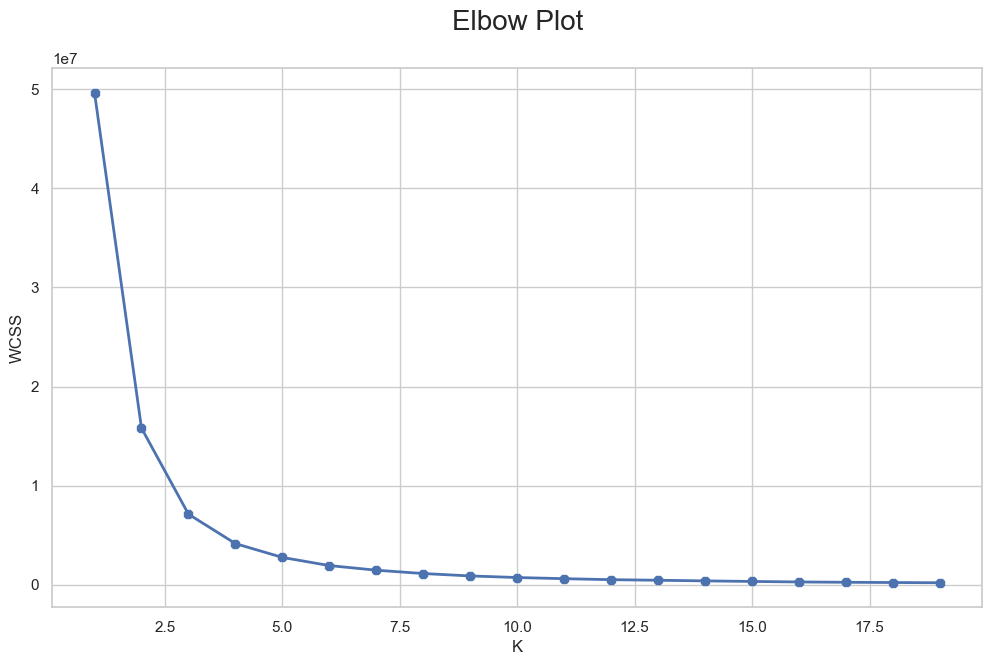

In [4]:
# Create an Elbow plot of WSS (Within-Cluster Sum of Squares)

X1 = df.loc[:, ['dating', 'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'sadness', 'feelings', 'age', 'len']].values
wcss = []

for k in range(1,20):
    kmeans = KMeans(n_clusters= k, init="k-means++" , random_state= 42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize= (12,7))

sns.set(style="whitegrid")
plt.plot(range(1, 20), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

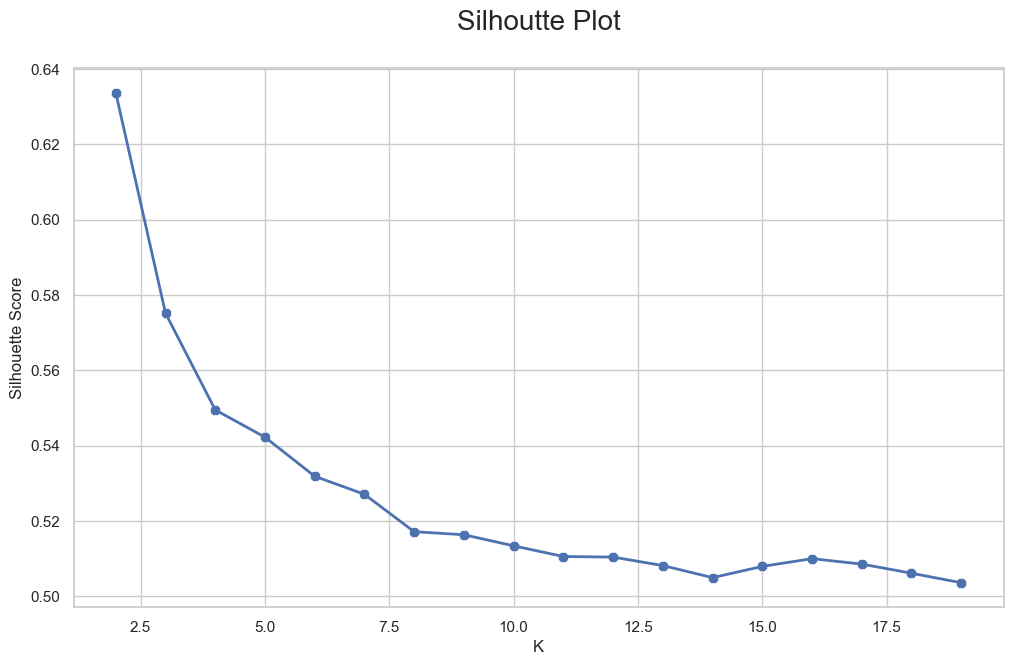

In [5]:
# Now lets create a plot of silhoutte score 


silhouette = []
for k in range(2, 20):

    kmeans = KMeans(n_clusters = k, init = 'k-means++',random_state= 42)
    predictions = kmeans.fit_predict(X1)
    silhouette.append(metrics.silhouette_score(X1, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 20), silhouette, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

# Looking at the Elbow and Silhouette plot , we will have K = 4 


In [6]:

# Initialize a KMeans model to identify 4 distinct clusters in the dataset.
# Using 'k-means++' for smarter centroid initialization to speed up convergence.
# n_init is set to 50 to run the algorithm multiple times with different centroid seeds
# and pick the best result based on inertia (within-cluster sum of squares).
# random_state ensures reproducibility of results.

kmeans =  KMeans(n_clusters= 4, init = "k-means++" ,n_init= 50,  random_state= 42)

# Fit the KMeans model to the dataset X1
kmeans.fit(X1)

# Initializes a KMeans model with 4 clusters using k-means++ initialization and a fixed random seed for reproducibility.
kmeans = KMeans(n_clusters=4, init="k-means++", n_init=20, random_state=42)


In [7]:
# Generate labels for the dataset 

labels = kmeans.fit_predict(X1)
labels

array([0, 1, 1, ..., 3, 3, 3], dtype=int32)

In [8]:
#output the centroids of your clusters 

kmeans.cluster_centers_

array([[2.04270215e-02, 1.47056391e-01, 1.04572781e-01, 5.56767163e-02,
        2.15281611e-02, 1.81005471e-02, 3.10296776e-02, 7.16415553e-02,
        1.24452357e-01, 5.29636816e-02, 5.93765343e-02, 4.63353649e-02,
        2.53211300e-02, 1.04296113e-01, 3.11464827e-02, 3.44542016e-01,
        1.05784855e+02],
       [2.15363385e-02, 9.54333285e-02, 1.40876671e-01, 6.13075408e-02,
        1.36314603e-02, 1.63487401e-02, 7.16464788e-02, 8.23656639e-02,
        4.25134088e-02, 7.05007061e-02, 3.20482314e-02, 5.19630790e-02,
        2.39092427e-02, 1.58888631e-01, 3.29265759e-02, 5.03005918e-01,
        3.53326558e+01],
       [1.78918404e-02, 1.12138592e-01, 7.21925890e-02, 3.68788963e-02,
        2.50139369e-02, 1.63031157e-02, 1.73753154e-02, 6.31760791e-02,
        3.22147609e-01, 3.50270579e-02, 6.75758599e-02, 3.48090305e-02,
        2.29507973e-02, 4.41194345e-02, 2.46066513e-02, 3.03374734e-01,
        1.65540353e+02],
       [2.19893577e-02, 1.28642073e-01, 1.23443873e-01, 6.016

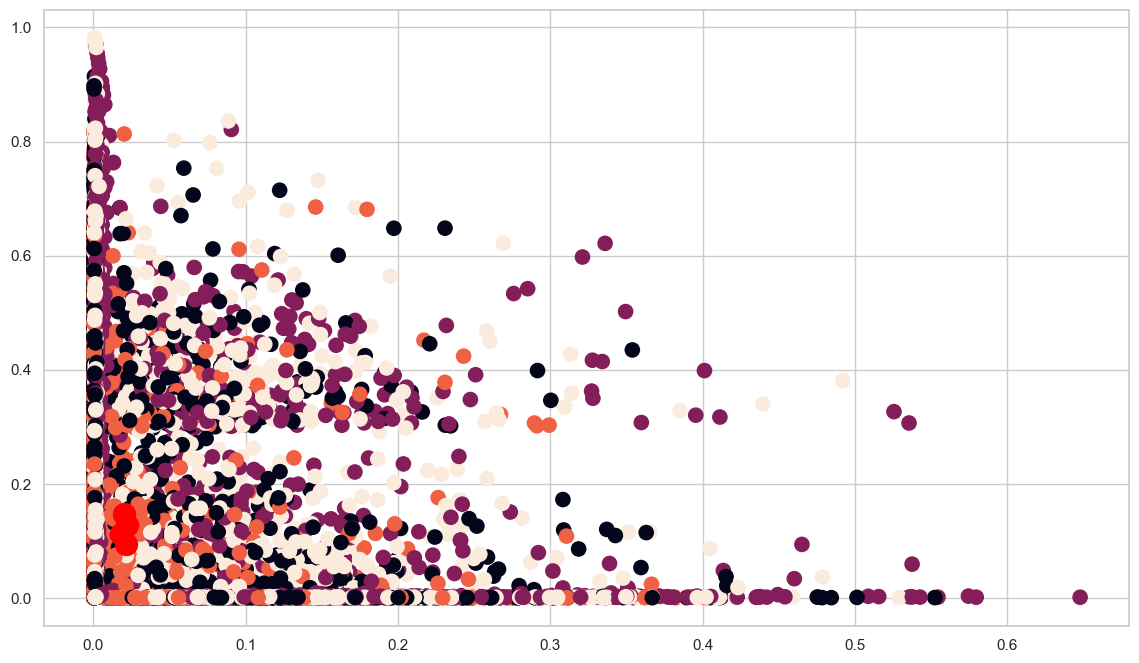

In [9]:
plt.figure(figsize = (14, 8))

plt.scatter(X1 [:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

# K means clustering with Scaling 

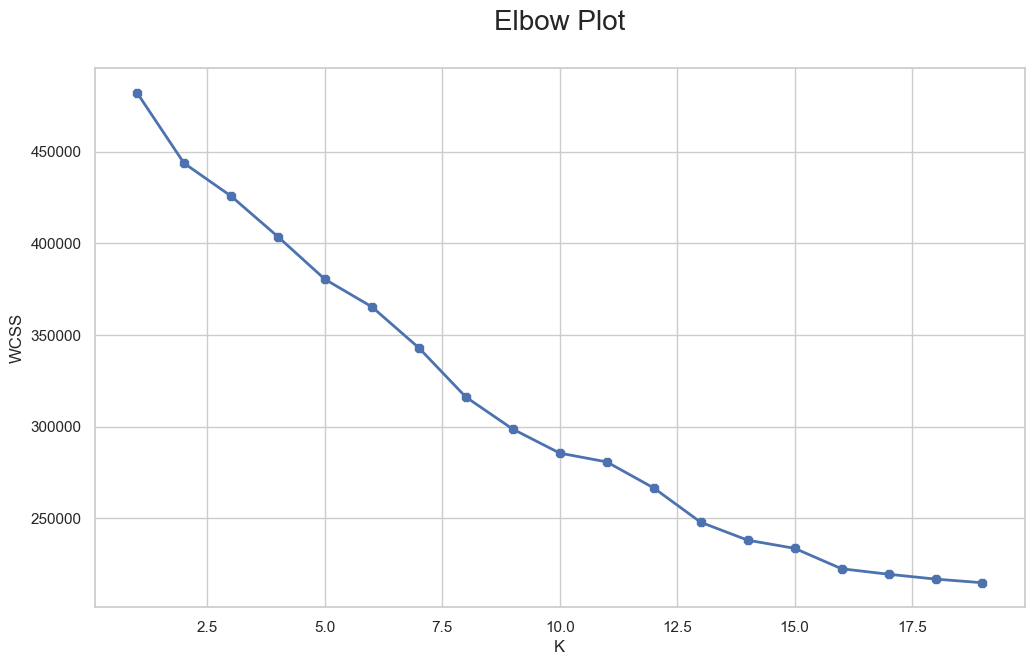

In [10]:
# Create a new KMeans object with 2 clusters. 
# Scaler used to make sure variables have equal range

scaler = StandardScaler()

#fit the Kmens Object
X1_scaled = scaler.fit_transform(X1)

wcss_scaled = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state= 42)
    kmeans.fit(X1_scaled)
    wcss_scaled.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 20), wcss_scaled, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()




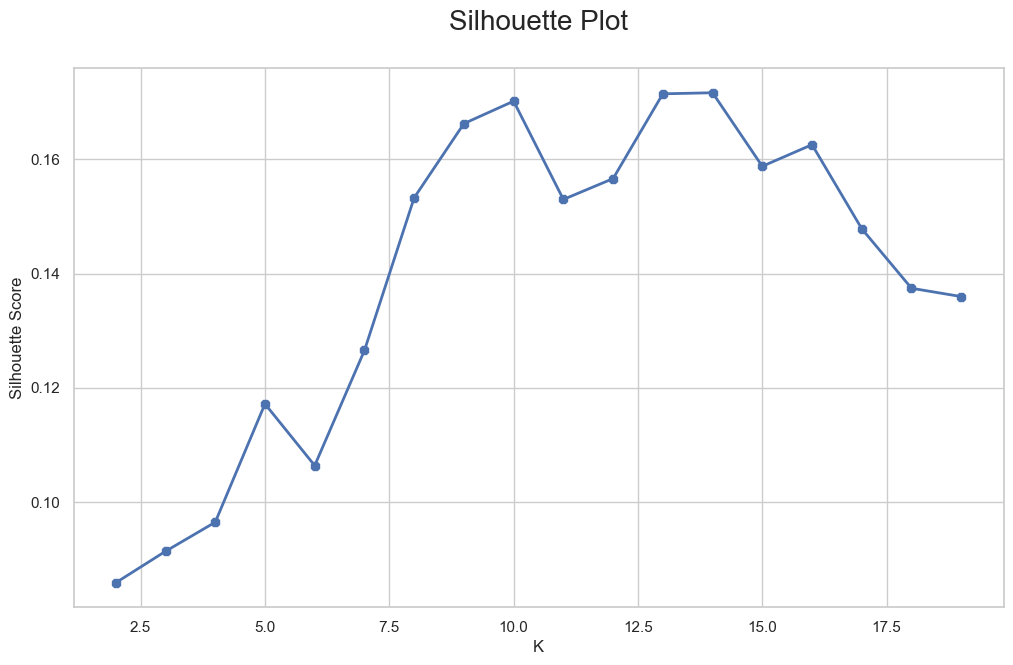

In [11]:
# create a plot of silhoutte score

sil_scaled = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state= 42)
    predictions = kmeans.fit_predict(X1_scaled)
    sil_scaled.append(metrics.silhouette_score(X1_scaled, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 20), sil_scaled, linewidth = 2, marker = '8')
plt.title('Silhouette Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()


# After doing the Elbow and Silhoutte plot for Kmeans with Scaling 
# Will with go with K = 13 

In [12]:
kmeans_scaled = KMeans(n_clusters=13, init="k-means++",n_init=50, random_state =42)
kmeans_scaled.fit(X1_scaled)

KMeans(n_clusters=13, n_init=50, random_state=42)

In [13]:
#Labels for scaled data
labels = kmeans_scaled.fit_predict(X1_scaled)
labels

array([ 7, 10,  0, ...,  5,  5,  5], dtype=int32)

In [34]:
#Get centroids
kmeans_scaled.cluster_centers_

array([[-1.31384983e-01, -4.57557211e-01, -4.08359796e-01,
        -2.16611166e-01, -1.72851208e-01, -4.45843631e-02,
        -1.94822022e-01, -7.06969576e-02, -3.86201309e-01,
         2.92503566e+00,  1.39958394e-01, -1.17018665e-02,
        -5.88634808e-02, -3.78299469e-01, -1.39406142e-01,
         3.97980128e-01, -2.10526501e-01],
       [-1.85932725e-01, -4.23809354e-01,  1.85597919e+00,
        -2.13922844e-01, -1.86179527e-01, -1.60469081e-01,
        -1.59946470e-01,  1.28986254e-01, -4.04575858e-01,
        -2.52538044e-01,  2.01491983e-03, -1.61547252e-01,
        -1.20635564e-01, -3.36667371e-01, -9.58865599e-02,
         6.23809870e-02, -2.58946432e-01],
       [-3.53502349e-02, -1.71672201e-02, -1.01541408e-01,
        -1.15905514e-01,  4.18134942e+00, -1.13667865e-01,
        -1.70171108e-01, -2.45335569e-01,  1.79004642e-01,
        -1.86464501e-01, -2.04748456e-01, -2.52457198e-01,
        -1.52445878e-01, -2.25769295e-01, -7.50533330e-02,
        -2.05987481e-01,  1.7

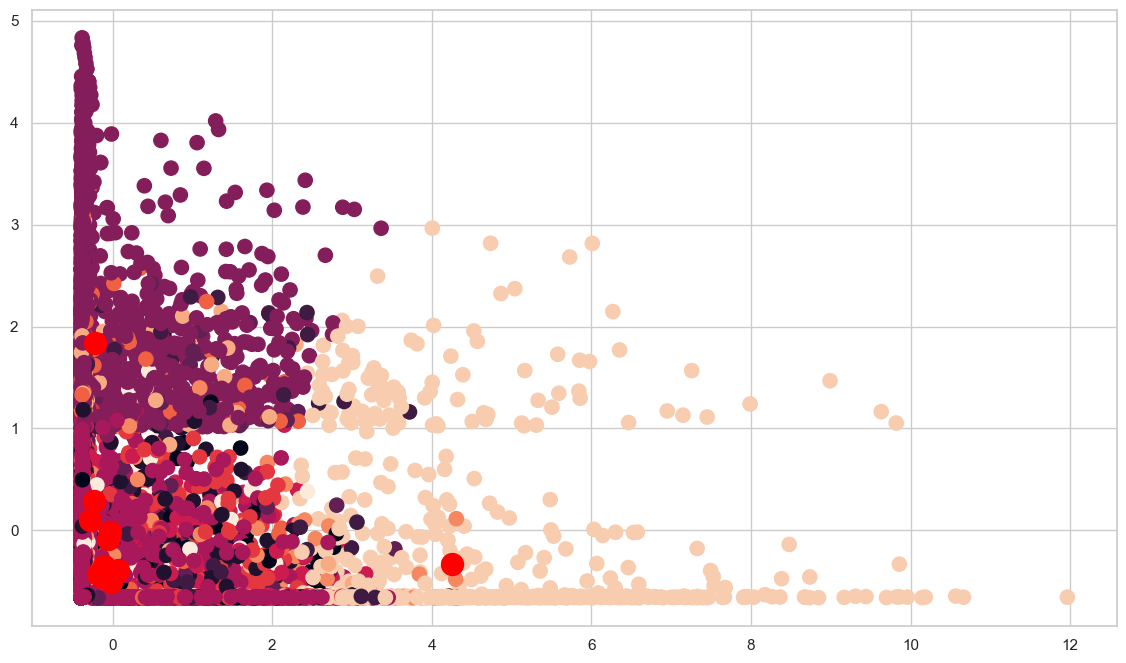

In [15]:
plt.figure(figsize = (14, 8))

plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c = kmeans_scaled.labels_, s = 105)
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1], color = 'red', s = 250)
plt.xlabel('')
plt.ylabel('')
plt.show()

# Kmeans Clustering with Scaling Visualized with PCA

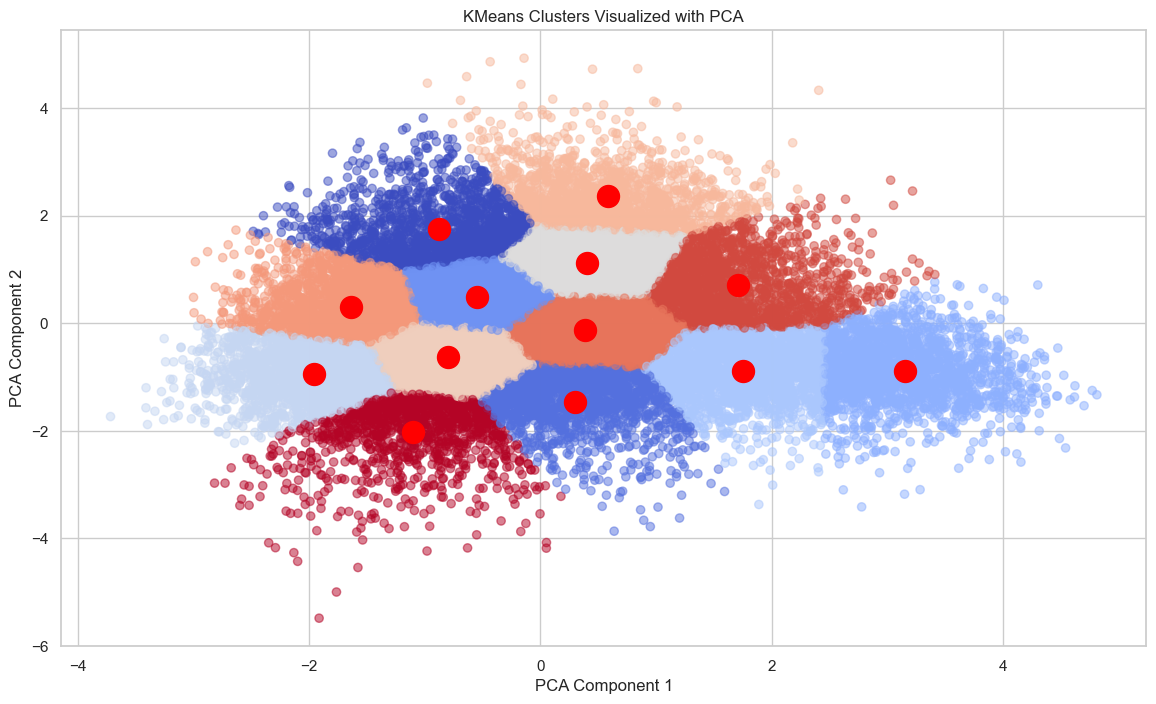

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X1_scaled)


clusters = kmeans_scaled.fit_predict(X_pca)

plt.figure(figsize=(14, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = clusters, cmap= "coolwarm", alpha = 0.5)
plt.scatter(kmeans_scaled.cluster_centers_[:,0], kmeans_scaled.cluster_centers_[:,1], color="red", s=250)
plt.title('KMeans Clusters Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


- Each dot represents a song, projected onto 2 principal components. These are the two new "summary" features created by PCA that capture the most variance with the 17 features we have within the data set. 
- Color coded regions show the different clusters discovered by KMeans. Each song has been assigned to one of the clusters based on similarity in PCA space. 
-  The red circles mark the centroids of each cluster - the center point of each group 
- Futhermore we can look into each cluster to see how there were grouped by (group by similar features, genere etc. )

In [17]:
#We are adding a Cluster column to are cleaned data set, using the scaled data KMeans with scaled data that was visualized with PCA

df['Cluster'] = kmeans_scaled.fit_predict(X1_scaled)

In [20]:
#Load Back in raw data set , apply so categorical columns to the clean data set 
df_raw = pd.read_csv("data/train.csv")

label1= df_raw[['genre', 'artist_name','track_name', 'release_date']]

label1 = pd.concat([label1, df], axis=1)

In [21]:
label1

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
0,pop,mukesh,mohabbat bhi jhoothi,1950,95,0.000598,0.063746,0.000598,0.000598,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.000000,7
1,pop,frankie laine,i believe,1950,51,0.035537,0.096777,0.443435,0.001284,0.001284,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.000000,10
2,pop,johnnie ray,cry,1950,24,0.002770,0.002770,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.000000,0
3,pop,pérez prado,patricia,1950,54,0.048249,0.001548,0.001548,0.001548,0.021500,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.000000,12
4,pop,giorgos papadopoulos,apopse eida oneiro,1950,48,0.001350,0.001350,0.417772,0.001350,0.001350,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,hip hop,mack 10,10 million ways,2019,78,0.001350,0.001350,0.001350,0.001350,0.001350,...,0.001350,0.391651,0.001350,0.435089,0.001350,0.001350,0.065664,0.001350,0.014286,5
28358,hip hop,m.o.p.,ante up (robbin hoodz theory),2019,67,0.001284,0.001284,0.035338,0.001284,0.001284,...,0.203889,0.318910,0.058152,0.134955,0.001284,0.001284,0.001284,0.001284,0.014286,5
28359,hip hop,nine,whutcha want?,2019,77,0.001504,0.154302,0.168988,0.001504,0.039755,...,0.001504,0.356685,0.001504,0.068684,0.001504,0.001504,0.001504,0.001504,0.014286,5
28360,hip hop,will smith,switch,2019,67,0.001196,0.001196,0.001196,0.001196,0.048359,...,0.001196,0.492434,0.103614,0.001196,0.202659,0.001196,0.001196,0.001196,0.014286,5


In [22]:
#Lets see how many songs are in each cluster
df['Cluster'].value_counts().sort_index().to_frame(name='Count')


,Count
Cluster,
0,2031
1,4084
2,859
3,802
4,4266
5,4111
6,1732
7,4607
8,1030


# *Taking a look into a few of the Clusters*

In [23]:
label1[df['Cluster']== 0]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
2,pop,johnnie ray,cry,1950,24,0.002770,0.002770,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.000000,0
16,pop,les paul,blue skies,1951,43,0.001385,0.001385,0.001385,0.065507,0.001385,...,0.001385,0.001385,0.600633,0.001385,0.249154,0.001385,0.001385,0.063931,0.985714,0
24,pop,mukesh,hum tujhse mohabbat kar ke,1952,73,0.000810,0.000810,0.000810,0.000810,0.000810,...,0.033341,0.000810,0.383721,0.000810,0.144411,0.000810,0.000810,0.083152,0.971429,0
26,pop,lata mangeshkar,main na janoon,1952,38,0.045052,0.002105,0.002105,0.002105,0.002105,...,0.046168,0.002105,0.555732,0.002105,0.260367,0.002105,0.002105,0.002105,0.971429,0
35,pop,les paul,i'm sitting on top of the world,1953,31,0.001880,0.001880,0.148561,0.046503,0.001880,...,0.001880,0.136184,0.458624,0.001880,0.001880,0.001880,0.040906,0.001880,0.957143,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27978,hip hop,fumez the engineer,pull up hop out bang,2016,118,0.000684,0.262988,0.000684,0.051223,0.000684,...,0.000684,0.000684,0.414587,0.000684,0.079075,0.018756,0.085033,0.000684,0.057143,0
28041,hip hop,audio two,make it funky,2017,82,0.001253,0.001253,0.001253,0.088804,0.001253,...,0.191160,0.001253,0.476353,0.001253,0.001253,0.053344,0.001253,0.001253,0.042857,0
28104,hip hop,shonlock,boggie bounce,2017,98,0.000731,0.089705,0.000731,0.000731,0.000731,...,0.420820,0.000731,0.357358,0.000731,0.046074,0.014655,0.000731,0.000731,0.042857,0
28280,hip hop,gang starr,jazz thing,2019,80,0.001224,0.207224,0.001224,0.001224,0.020080,...,0.034330,0.063255,0.328434,0.001224,0.001224,0.096014,0.001224,0.001224,0.014286,0


In [24]:
label1[df['Cluster']== 1]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
6,pop,freestyle,opm medley: when i met you,1950,179,0.000483,0.000483,0.371817,0.040712,0.000483,...,0.384703,0.000483,0.000483,0.000483,0.044355,0.000483,0.000483,0.123150,1.000000,1
15,pop,les paul,chicken reel,1951,199,0.000349,0.018417,0.391879,0.000349,0.025737,...,0.000349,0.000349,0.000349,0.000349,0.000349,0.000349,0.034922,0.026084,0.985714,1
34,pop,ghantasala,thunintha pin,1953,87,0.000877,0.000877,0.421309,0.057732,0.000877,...,0.181324,0.000877,0.034583,0.000877,0.024780,0.137959,0.000877,0.000877,0.957143,1
37,pop,t. m. soundararajan,ethanai periya,1953,74,0.001253,0.066192,0.335708,0.001253,0.027847,...,0.001253,0.001253,0.001253,0.382074,0.001253,0.055239,0.001253,0.001253,0.957143,1
40,pop,lata mangeshkar,chandan ka palna resham ko dori,1954,19,0.003509,0.003509,0.791505,0.003509,0.003509,...,0.003509,0.003509,0.003509,0.003509,0.003509,0.003509,0.003509,0.003509,0.942857,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28078,hip hop,killy,killamonjaro,2017,51,0.001385,0.001385,0.416293,0.001385,0.001385,...,0.087336,0.142589,0.001385,0.001385,0.001385,0.001385,0.001385,0.001385,0.042857,1
28302,hip hop,nappy roots,these walls (dirty mc edit),2019,66,0.001645,0.329733,0.430797,0.064963,0.001645,...,0.001645,0.001645,0.001645,0.057615,0.001645,0.001645,0.001645,0.001645,0.014286,1
28323,hip hop,young mc,bust a move,2019,10,0.004785,0.004785,0.732057,0.004785,0.004785,...,0.004785,0.004785,0.004785,0.004785,0.004785,0.004785,0.004785,0.004785,0.014286,1
28348,hip hop,q-tip,life is better,2019,36,0.001645,0.001645,0.440262,0.001645,0.001645,...,0.001645,0.205476,0.001645,0.001645,0.001645,0.001645,0.118270,0.049952,0.014286,1


In [25]:
label1[df['Cluster']== 2]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
33,pop,mukesh,raat andheri door savera,1953,83,0.000752,0.000752,0.414772,0.000752,0.204940,...,0.095277,0.000752,0.000752,0.108254,0.037576,0.000752,0.000752,0.099135,0.957143,2
159,pop,maria koterbska,cowboy jackie,1958,71,0.000835,0.000835,0.101066,0.116611,0.171898,...,0.000835,0.000835,0.000835,0.000835,0.047156,0.000835,0.412162,0.000835,0.885714,2
163,pop,ricky nelson,there goes my baby,1958,68,0.124545,0.024186,0.000849,0.037741,0.108896,...,0.000849,0.300928,0.127606,0.110692,0.000849,0.000849,0.000849,0.082219,0.885714,2
255,pop,jackie wilson,it's all a part of love,1959,26,0.127882,0.001949,0.314092,0.001949,0.179873,...,0.001949,0.001949,0.001949,0.001949,0.001949,0.001949,0.042628,0.037748,0.871429,2
303,pop,neil sedaka,all i need is you,1959,43,0.001316,0.001316,0.145022,0.001316,0.212920,...,0.001316,0.037990,0.074464,0.001316,0.155461,0.043563,0.001316,0.001316,0.871429,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28102,hip hop,fabolous,sickalicious (feat. missy elliott),2017,59,0.001815,0.074470,0.001815,0.001815,0.240532,...,0.001815,0.437209,0.001815,0.001815,0.117808,0.001815,0.001815,0.001815,0.042857,2
28122,hip hop,busta rhymes,bladow!!,2017,96,0.001053,0.001053,0.063893,0.001053,0.209222,...,0.001053,0.607515,0.001053,0.001053,0.001053,0.001053,0.001053,0.001053,0.042857,2
28131,hip hop,6lack,that far,2017,149,0.030939,0.112107,0.000537,0.000537,0.152558,...,0.045372,0.510717,0.000537,0.000537,0.000537,0.000537,0.000537,0.063127,0.042857,2
28132,hip hop,yg,fdt,2017,106,0.000810,0.030184,0.000810,0.000810,0.145129,...,0.148310,0.533239,0.000810,0.000810,0.000810,0.077712,0.000810,0.000810,0.042857,2


In [26]:
label1[df['Cluster']== 3]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
19,pop,asha bhosle,awaz deta hai sola ka din,1952,148,0.000431,0.031304,0.000431,0.000431,0.016906,...,0.000431,0.055847,0.072209,0.000431,0.000431,0.000431,0.000431,0.426457,0.971429,3
23,pop,les paul,smoke rings,1952,35,0.001645,0.001645,0.001645,0.001645,0.001645,...,0.001645,0.128530,0.365303,0.001645,0.256757,0.001645,0.071715,0.001645,0.971429,3
104,pop,harry belafonte,angelique-o,1957,88,0.001096,0.060288,0.422963,0.001096,0.001096,...,0.001096,0.001096,0.001096,0.001096,0.001096,0.001096,0.001096,0.001096,0.900000,3
115,pop,harry belafonte,cu cu ru cu cu paloma,1957,54,0.001595,0.001595,0.149188,0.001595,0.001595,...,0.001595,0.001595,0.177937,0.001595,0.172923,0.001595,0.324376,0.032819,0.900000,3
116,pop,harry belafonte,cordelia brown,1957,42,0.001949,0.001949,0.495373,0.035969,0.107587,...,0.001949,0.001949,0.001949,0.001949,0.001949,0.001949,0.001949,0.110561,0.900000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27888,hip hop,kwest tha madd lad,718,2014,115,0.000526,0.397346,0.048035,0.000526,0.000526,...,0.000526,0.000526,0.186078,0.000526,0.115393,0.000526,0.000526,0.000526,0.085714,3
27955,hip hop,del the funky homosapien,mistadobalina,2015,57,0.002924,0.002924,0.089636,0.002924,0.002924,...,0.111665,0.443746,0.002924,0.002924,0.002924,0.002924,0.002924,0.002924,0.071429,3
27973,hip hop,rahn harper,earnings,2016,185,0.022516,0.064558,0.138657,0.000393,0.000393,...,0.035050,0.305691,0.000393,0.146238,0.000393,0.039871,0.051139,0.000393,0.057143,3
28125,hip hop,pusha t,circles,2017,84,0.000957,0.000957,0.000957,0.000957,0.108808,...,0.000957,0.461227,0.000957,0.000957,0.134636,0.000957,0.000957,0.000957,0.042857,3


In [33]:
label1[df['Cluster'] == 8].sample(5)

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
22462,reggae,tribal seeds,rider,2005,96,0.001170,0.352914,0.001170,0.001170,0.001170,...,0.082055,0.001170,0.033556,0.221307,0.001170,0.237492,0.057471,0.001170,0.214286,8
3344,pop,r.e.m.,lightnin' hopkins,1987,44,0.003289,0.354395,0.003289,0.003289,0.003289,...,0.003289,0.003289,0.003289,0.003289,0.003289,0.150892,0.003289,0.003289,0.471429,8
19276,jazz,brooklyn funk essentials,the creator has a master plan,1995,39,0.001815,0.001815,0.456279,0.001815,0.001815,...,0.001815,0.001815,0.001815,0.001815,0.221207,0.251695,0.043596,0.001815,0.357143,8
15475,blues,widespread panic,trouble,2001,58,0.001196,0.001196,0.001196,0.001196,0.001196,...,0.001196,0.001196,0.001196,0.244593,0.001196,0.386111,0.304695,0.001196,0.271429,8
13564,blues,t. rex,children of the revolution,1972,40,0.001754,0.125220,0.001754,0.001754,0.036658,...,0.001754,0.001754,0.001754,0.001754,0.001754,0.303422,0.439313,0.070826,0.685714,8


---

# New Sample Prediction 

# KMeans Clustering with Scaling and PCA

In [37]:
# Load new sample test data 

file_path = r"data/recommend.csv"
df_test = pd.read_csv(file_path)



df_test.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,topic,age
0,76885,godsmack,immune,1998,rock,come world society futher place home land deat...,74,0.000907,0.348191,0.375448,...,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.000907,0.018854,world/life,0.314286
1,65394,dennis brown,second chance,1993,reggae,maybe maybe treat good feel second best girl s...,43,0.001224,0.029943,0.001224,...,0.001224,0.001224,0.001224,0.001224,0.001224,0.056842,0.001224,0.062092,night/time,0.385714
2,10980,the black crowes,sister luck,1990,pop,worry sick eye hurt rest head life outside gir...,54,0.001120,0.482490,0.001120,...,0.001120,0.001120,0.001120,0.078222,0.001120,0.051132,0.031571,0.202862,violence,0.428571
3,842,jerry lee lewis,your cheating heart,1960,pop,cheat heart weep sleep sleep come night cheat ...,25,0.204740,0.002506,0.002506,...,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,sadness,0.857143
4,2764,paul anka,eso beso,1966,pop,beso kiss beso kiss know samba bossanova close...,97,0.001170,0.001170,0.001170,...,0.001170,0.001170,0.001170,0.314626,0.001170,0.053731,0.001170,0.001170,romantic,0.771429


In [38]:
#Lets remove the columns we will not use , just like with the previous test data 
df_test_clean= df_test.drop(['Unnamed: 0','artist_name','lyrics', 'track_name', 'genre', 'topic', 'like/girls', 'release_date'], axis=1)

In [43]:
# Copy test dataset to a new variable for transformation
G1 = df_test_clean.loc[:, ['dating', 'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'sadness', 'feelings', 'age', 'len']].values  # G1 is used for scaled processing to preserve the original df_test

# Scaling the test data
scaler = StandardScaler()
G1_scaled = scaler.fit_transform(G1)




# Fit the KMeans model on the scaled data and assign cluster labels to the original dataframe
df_test_clean['Cluster'] = kmeans_scaled.predict(G1_scaled)


In [40]:
df_test_clean

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
0,74,0.000907,0.348191,0.375448,0.000907,0.225414,0.000907,0.000907,0.000907,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.018854,0.314286,2
1,43,0.001224,0.029943,0.001224,0.306688,0.001224,0.033440,0.069637,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714,6
2,54,0.001120,0.482490,0.001120,0.001120,0.001120,0.113651,0.001120,0.001120,0.001120,0.001120,0.001120,0.078222,0.001120,0.031571,0.202862,0.428571,3
3,25,0.204740,0.002506,0.002506,0.129818,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,0.857143,11
4,97,0.001170,0.001170,0.001170,0.050289,0.001170,0.023530,0.541449,0.001170,0.001170,0.001170,0.001170,0.314626,0.001170,0.001170,0.001170,0.771429,12
5,57,0.001462,0.487965,0.140561,0.001462,0.001462,0.001462,0.001462,0.238731,0.001462,0.001462,0.001462,0.001462,0.077630,0.001462,0.034645,0.971429,8
6,152,0.000675,0.000675,0.134044,0.293819,0.000675,0.000675,0.012990,0.066012,0.460145,0.000675,0.000675,0.000675,0.024217,0.000675,0.000675,0.285714,5
7,37,0.051874,0.001645,0.001645,0.084118,0.037341,0.001645,0.001645,0.460564,0.001645,0.001645,0.001645,0.001645,0.001645,0.314594,0.001645,0.714286,7
8,41,0.001504,0.001504,0.132148,0.492312,0.001504,0.001504,0.001504,0.321439,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.485714,6
9,91,0.000711,0.543658,0.114697,0.098286,0.014720,0.000711,0.000711,0.075524,0.000711,0.000711,0.000711,0.000711,0.000711,0.118886,0.015028,0.157143,4


In [41]:
# Extract original label columns that were previously dropped
label2 = df_test[['genre', 'artist_name', 'track_name','release_date']]

# Concatenate the labels with the test data (including cluster assignments) for descriptive analysis
label2 = pd.concat([label2, df_test_clean], axis=1)


In [44]:
#Lets see how many songs are in each cluster
df_test_clean['Cluster'].value_counts().sort_index().to_frame(name='Songs')


,Songs
Cluster,
2,1
3,1
4,1
5,1
6,2
7,1
8,1
11,1
12,1


## The only cluster with 2 songs together in this test data...

In [49]:
label2[df_test_clean['Cluster']==6]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
1,reggae,dennis brown,second chance,1993,43,0.001224,0.029943,0.001224,0.306688,0.001224,...,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714,6
8,country,randy travis,messin' with my mind,1986,41,0.001504,0.001504,0.132148,0.492312,0.001504,...,0.321439,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.485714,6
